In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

1. Кластеризация неразмеченных образов алгоритмом Ллойда.

In [2]:
np.random.seed(0)

data_x = [(48, 118), (74, 96), (103, 82), (135, 76), (162, 79), (184, 97), (206, 111), (231, 118), (251, 118), (275, 110), (298, 86), (320, 68), (344, 62), (376, 61), (403, 75), (424, 95), (440, 114), (254, 80), (219, 85), (288, 66), (260, 92), (201, 76), (162, 66), (127, 135), (97, 143), (83, 160), (82, 177), (88, 199), (105, 205), (135, 208), (151, 198), (157, 169), (153, 152), (117, 158), (106, 168), (106, 185), (123, 188), (125, 171), (139, 163), (139, 183), (358, 127), (328, 132), (313, 146), (300, 169), (300, 181), (308, 197), (326, 206), (339, 209), (370, 199), (380, 184), (380, 147), (343, 154), (329, 169), (332, 184), (345, 185), (363, 159), (361, 177), (344, 169), (311, 175), (351, 89), (134, 96)]

M = np.mean(data_x, axis=0)      # вычисление средних по каждой координате
D = np.var(data_x, axis=0)       # вычисление дисперсий по каждой координате
K = 3                       # число кластеров
ma = [np.random.normal(M, np.sqrt(D / 10), 2) for n in range(K)]        # начальные центры кластеров

ro = lambda x, m: (np.abs(x - m)).mean()

max_iterations = 10

for _ in range(max_iterations):
    X = [[] for _ in range(K)]
    for x in data_x:
        r = [ro(x, m) for m in ma]
        X[np.argmin(r)].append(x)

    ma = np.array([np.mean(cluster, axis=0) for cluster in X])

Алгоритм Ллойда с метрикой:
### $\rho = \frac{1}{n} \sum \vert{x_{k} - x_{m}}\vert$

Недостаток алгоритма заключается в том, что кластеры со сложной структурой (формой) данный метод распознает некорректно, что показано на рисунке:

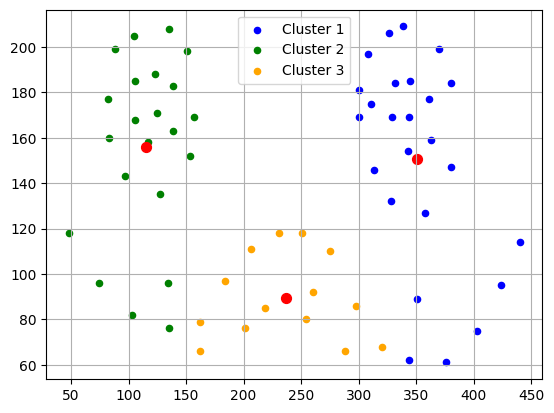

In [3]:
COLORS = ['blue', 'green', 'orange']
plt.grid()

for i in range(K):
    xx = np.array(X[i]).T
    plt.scatter(xx[0], xx[1], s=20, color=COLORS[i], label=f'Cluster {i+1}')
    
mx = [m[0] for m in ma]
my = [m[1] for m in ma]

plt.scatter(mx, my, s=50, color='red')
plt.legend()
plt.show()

2. Кластеризация размеченных образов алгоритмом Ллойда.

In [4]:
T = [[(365, 200), (390, 180), (350, 172), (400, 171)], [(77, 150), (100, 200), (50, 130)], [(250, 100), (170, 88), (280, 102), (230, 108)]]
data_x = [(48, 118), (74, 96), (103, 82), (135, 76), (162, 79), (184, 97), (206, 111), (231, 118), (251, 118), (275, 110), (298, 86), (320, 68), (344, 62), (376, 61), (403, 75), (424, 95), (440, 114), (254, 80), (219, 85), (288, 66), (260, 92), (201, 76), (162, 66), (127, 135), (97, 143), (83, 160), (82, 177), (88, 199), (105, 205), (135, 208), (151, 198), (157, 169), (153, 152), (117, 158), (106, 168), (106, 185), (123, 188), (125, 171), (139, 163), (139, 183), (358, 127), (328, 132), (313, 146), (300, 169), (300, 181), (308, 197), (326, 206), (339, 209), (370, 199), (380, 184), (380, 147), (343, 154), (329, 169), (332, 184), (345, 185), (363, 159), (361, 177), (344, 169), (311, 175), (351, 89), (134, 96)]

K = 3                       # число кластеров

ro = lambda x, m: ((x-m)**2).mean()

ma = [np.mean(t, axis=0) for t in T] # центры кластеров
max_iterations = 10

for _ in range(max_iterations):
    X = [[] for _ in range(K)]
    for x in data_x:
        r = [ro(x, m) for m in ma]
        X[np.argmin(r)].append(x)
    for i in range(K):
        X[i].extend(T[i])
    ma = [np.mean(xx, axis=0) for xx in X]

Метрика для алгоритма Ллойда:
### $\rho = \frac{1}{n} \sum (x_{k} - x_{m})^2$

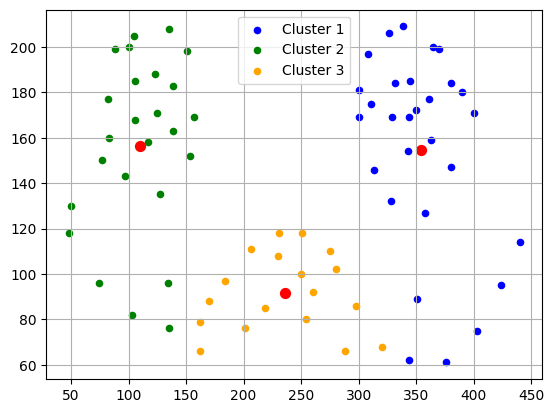

In [5]:
COLORS = ['blue', 'green', 'orange']
plt.grid()

for i in range(K):
    xx = np.array(X[i]).T
    plt.scatter(xx[0], xx[1], s=20, color=COLORS[i], label=f'Cluster {i+1}')
    
mx = [m[0] for m in ma]
my = [m[1] for m in ma]

plt.scatter(mx, my, s=50, color='red')
plt.legend()
plt.show()

3. Кластеризация с помощью алгоритма DBSCAN.

In [6]:
X = [(58, 138), (74, 96), (103, 82), (135, 76), (162, 79), (184, 97), (206, 111), (231, 118), (251, 118),  (275, 110), (298, 86), (320, 68), (344, 62), (376, 61), (403, 75), (414, 90), (430, 100), (254, 80), (219, 85), (288, 66), (260, 92), (201, 76), (162, 66), (127, 135), (97, 143), (83, 160), (82, 177), (88, 199), (105, 205), (135, 208), (151, 198), (157, 169), (153, 152), (117, 158), (106, 168), (106, 185), (123, 188), (125, 171), (139, 163), (139, 183), (358, 127), (328, 132), (313, 146), (300, 169), (300, 181), (308, 197), (326, 206), (339, 209), (370, 199), (380, 184), (380, 147), (343, 154), (329, 169), (332, 184), (345, 185), (363, 159), (361, 177), (344, 169), (311, 175), (351, 89), (134, 96)]
X = np.array(X)

e = np.arange(20, 70, 5)
sample = [i for i in range(1, len(e)+1)]
eps = 0
min_sample = 0
K = 3

for xxx in e:
    for yyy in sample:
        clustering = DBSCAN(eps=xxx, min_samples=yyy, metric='euclidean')
        res = clustering.fit_predict(X)
        if -1 not in res and len(set(res)) == K:
            eps = xxx
            min_sample = yyy
            
            
clustering = DBSCAN(eps=eps, min_samples=min_sample, metric='euclidean')
res = clustering.fit_predict(X)

Для алгоритма DBSCAN подобраны параметры так, чтобы результат не содержал шумовых образов (-1) и количество кластеров было равно трем.

В отличие от алгоритма Ллойда, DBSCAN лучше справляется с кластерами со сложной формой:

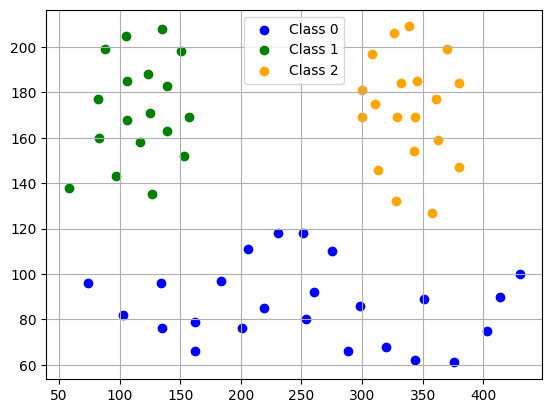

In [7]:
COLORS = ['blue', 'green', 'orange']
plt.grid()

x0 = X[res == 0]
x1 = X[res == 1]
x2 = X[res == 2]

plt.scatter(x0[:, 0], x0[:, 1], color=COLORS[0], label='Class 0')
plt.scatter(x1[:, 0], x1[:, 1], color=COLORS[1], label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], color=COLORS[2], label='Class 2')

plt.legend()

4. Кластеризация неразмеченных образов с помощью алгоритма агломеративной иерархической кластеризации.

In [8]:
X = [(189, 185), (172, 205), (156, 221), (154, 245), (164, 265), (183, 275), (204, 276), (227, 271), (241, 255), (250, 229), (240, 197), (217, 183), (194, 202), (179, 224), (179, 248), (199, 249), (197, 227), (211, 214), (211, 242), (210, 265), (226, 237), (218, 196), (79, 106), (97, 132), (117, 159), (138, 174), (148, 163), (140, 145), (121, 123), (112, 108), (89, 92), (282, 162), (298, 180), (344, 154), (344, 113), (362, 67), (397, 77), (412, 121), (379, 112), (377, 148), (312, 130)]

X = np.array(X)

clustering = AgglomerativeClustering(n_clusters=3, linkage="ward", metric="euclidean")

res = clustering.fit_predict(X)

x0 = X[res==0]
x1 = X[res==1]
x2 = X[res==2]

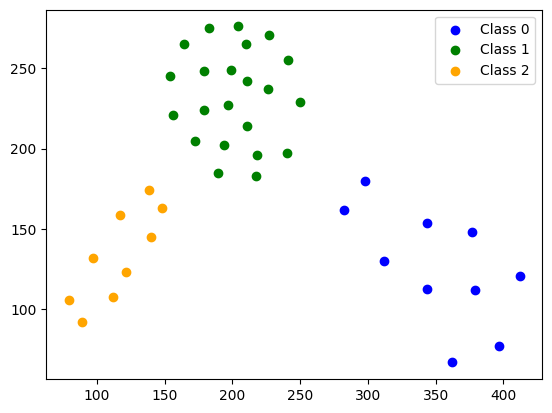

In [9]:
plt.scatter(x0[:, 0], x0[:, 1], color=COLORS[0], label='Class 0')
plt.scatter(x1[:, 0], x1[:, 1], color=COLORS[1], label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], color=COLORS[2], label='Class 2')

plt.legend()